In [90]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr
import rioxarray 
# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Other libraries (e.g. paths, filenames, zipfile extraction)
from glob import glob
from pathlib import Path
from os.path import basename
import zipfile
import urllib3 
urllib3.disable_warnings() # Disable "InsecureRequestWarning" 
import pandas as pd                           # for data download via API
    
import os    
import geopandas as gpd
import matplotlib.dates as mdates
from pythia_datasets import DATASETS
import nc_time_axis

import cmocean as cm
import cartopy.feature as cft

import seaborn as sns
sns.set_style("whitegrid")

import altair as alt   

from matplotlib import ticker
import glob as glob
import nctoolkit as nc

In [91]:
DATADIR = '/home/c4ubuntu/projDir/Indonesia/Data/CMIP6/Monthly/'

# Temperature

### Import Yearly CMIP6 Data from CDSAPI

In [92]:
annual_temp = xr.open_mfdataset(f'{DATADIR}/Aggregated/cmip6_tas_year_agg*.nc')

annual_temp.load()

<xarray.Dataset>
Dimensions:     (year: 121, model: 7, experiment: 4)
Coordinates:
  * year        (year) int64 1980 1981 1982 1983 1984 ... 2097 2098 2099 2100
  * model       (model) object 'HadGEM3-GC31-LL' 'INM-CM4-8' ... 'UKESM1-0-LL'
  * experiment  (experiment) object 'historical' 'ssp126' 'ssp245' 'ssp585'
    height      (model) float64 1.5 2.0 2.0 2.0 2.0 2.0 1.5
Data variables:
    tas         (experiment, model, year) float64 27.52 27.29 ... 33.12 32.94

### Import Monthly CMIP6 Data from CDSAPI with time objects that match

In [94]:
monthly_temp = xr.open_mfdataset(glob.glob(f'{DATADIR}/Aggregated/cmip6_tas_month_agg*T12:00:*.nc'))

monthly_temp.load()

<xarray.Dataset>
Dimensions:     (time: 1452, model: 4, experiment: 4)
Coordinates:
  * time        (time) datetime64[ns] 1980-01-16T12:00:00 ... 2100-12-16T12:0...
  * model       (model) object 'ACCESS-CM2' 'IPSL-CM6A-LR' ... 'MPI-ESM1-2-LR'
  * experiment  (experiment) object 'historical' 'ssp126' 'ssp245' 'ssp585'
    height      float64 2.0
Data variables:
    tas         (experiment, model, time) float64 28.74 28.66 ... 30.24 30.32

### Import from PANGEO

In [27]:
os.listdir('/home/c4ubuntu/projDir/Indonesia/Data/CMIP6/Pangeo/')

['CMIP6_TAS_Yearly.nc', 'CMIP6_PR_Yearly.nc']

In [29]:
annual_temp_pangeo = xr.open_mfdataset('/home/c4ubuntu/projDir/Indonesia/Data/CMIP6/Pangeo/CMIP6_TAS_Yearly.nc')

annual_temp_pangeo.load()

<xarray.Dataset>
Dimensions:        (year: 250, experiment_id: 4, source_id: 31)
Coordinates:
  * year           (year) float64 1.85e+03 1.851e+03 ... 2.098e+03 2.099e+03
  * experiment_id  (experiment_id) object 'historical' 'ssp126' ... 'ssp585'
  * source_id      (source_id) object 'ACCESS-CM2' 'AWI-CM-1-1-MR' ... 'TaiESM1'
Data variables:
    tas            (source_id, experiment_id, year) float64 300.9 ... 304.2

### Visualise CMIP6

### Projected timeseries

/home/c4ubuntu/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered


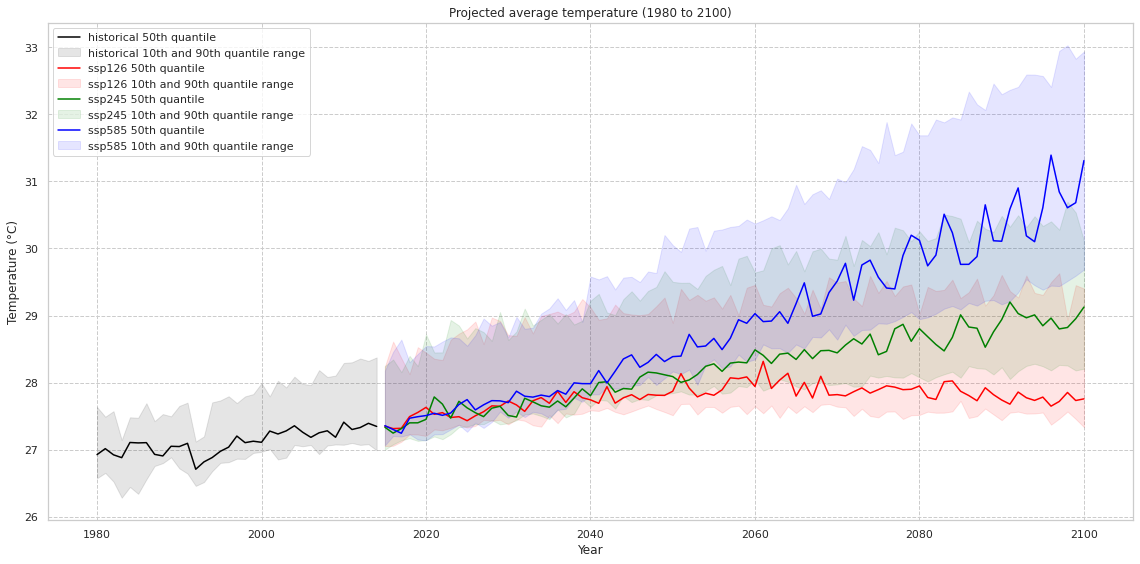

In [95]:
data = annual_temp.tas

experiments = ['historical', 'ssp126', 'ssp245', 'ssp585']

data_90 = data.quantile(0.9, dim='model')
data_10 = data.quantile(0.1, dim='model')
data_50 = data.quantile(0.5, dim='model')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))

colours = ['black','red','green','blue']
for i in np.arange(len(experiments)):
    ax.plot(data_50.year, data_50[i,:], color=f'{colours[i]}', 
            label=f'{data_50.experiment[i].values} 50th quantile')
    ax.fill_between(data_50.year, data_90[i,:], data_10[i,:], alpha=0.1, color=f'{colours[i]}', 
            label=f'{data_50.experiment[i].values} 10th and 90th quantile range')

#ax.set_xlim(2100)
ax.set_title('Projected average temperature (1980 to 2100)')
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('Year')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.grid(linestyle='--')

#fig.savefig(f'{DATADIR}CMIP6_annual_global_tas.png')


# Monthly temperature

/tmp/ipykernel_3728/3498552945.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


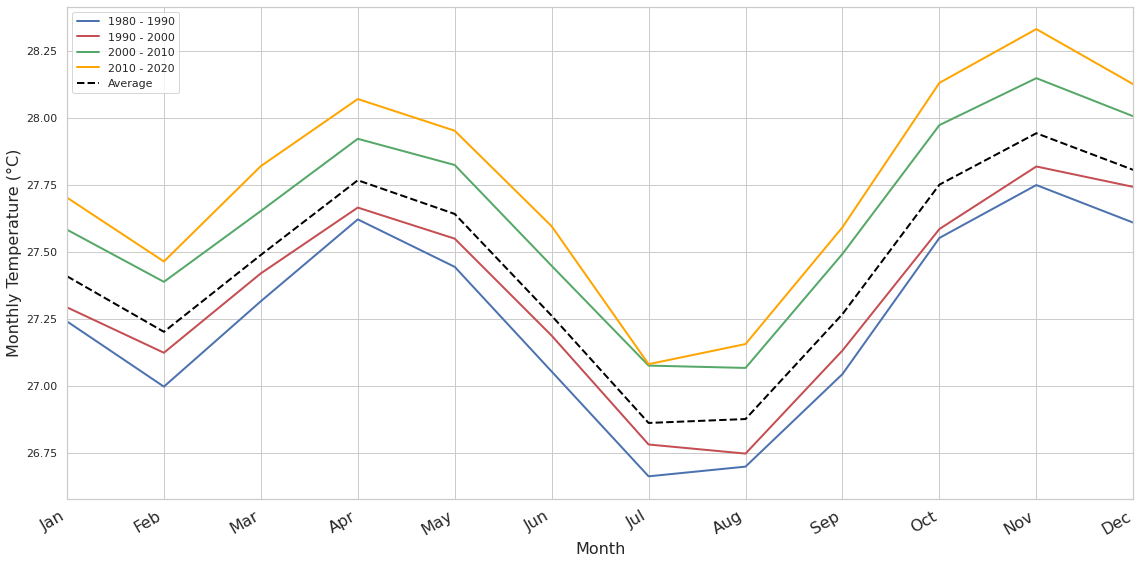

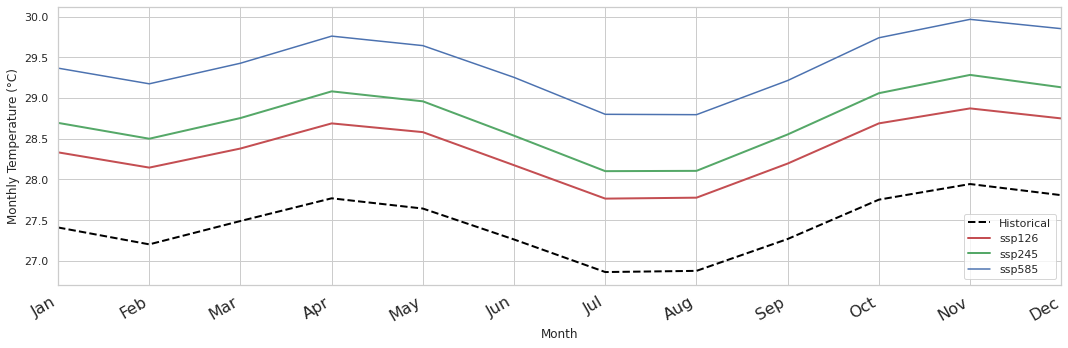

In [96]:
monthly_temp = xr.open_mfdataset(glob.glob(f'{DATADIR}/Aggregated/cmip6_tas_month_agg*T12:00:*.nc'))

monthly_temp.load()

### Monthly timeseries

temp = monthly_temp.tas.mean(dim='model')

fig, ax = plt.subplots(1, 1 , figsize=(16,8))

temp[0].sel(time=slice("1980", "1990")).groupby('time.month').mean().plot(ax=ax, color='b', linewidth=2, label='1980 - 1990')
temp[0].sel(time=slice("1990", "2000")).groupby('time.month').mean().plot(ax=ax,  color='r', linewidth=2, label='1990 - 2000')
temp[0].sel(time=slice("2000", "2010")).groupby('time.month').mean().plot(ax=ax,  color='g', linewidth=2, label='2000 - 2010')
temp[0].sel(time=slice("2010", "2015")).groupby('time.month').mean().plot(ax=ax,  color='orange', linewidth=2, label='2010 - 2020')
temp[0].groupby('time.month').mean().plot(ax=ax,  color='black', linewidth=2, linestyle= 'dashed', label='Average')

ax.legend()
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Monthly Temperature (°C)', fontsize=16)

fig.autofmt_xdate()


plt.title('')
plt.xlim(1, 12)
plt.locator_params(axis='x', nbins=12)
ax.set_xticklabels(('Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize=16)
plt.tight_layout()

#plt.savefig('Monthlytemp.png', dpi=300)

temp = monthly_temp.tas.mean(dim='model')
temp = temp.groupby('time.month').mean()

fig, ax = plt.subplots(1, 1 , figsize=(15,5))

ax.plot(temp[0],  color='black', linewidth=2, linestyle= 'dashed',label='Historical')
ax.plot(temp[1],  color='r', linewidth=2, label='ssp126')
ax.plot(temp[2],  color='g', linewidth=2, label='ssp245')
ax.plot(temp[3], color='b', label='ssp585')

ax.legend()
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Monthly Temperature (°C)', fontsize=12)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

plt.xlim(0, 11)

#plt.locator_params(axis='x', nbins=12)

positions = [0, 1, 2, 3, 4, 5,6,7,8,9,10,11]

ax.xaxis.set_major_locator(ticker.FixedLocator(positions))

ax.set_xticklabels(('Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), fontsize=16)

plt.tight_layout()

# Yearly temperature anomalies from Yearly CMIP CDS 

### Historical

**Monthly Data**

In [97]:
temp = monthly_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].groupby('time.month').mean('time')
# Difference
ann_tas_anom = temp[0].groupby('time.month') - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc['1980':'2015']

df_tas = ann_tas_anom.to_dataframe()

df_tas = df_tas.resample('1Y').mean()

df_tas['positive'] = df_tas['tas'] > 0
df_tas['Rolling'] = df_tas['tas'].rolling(5).mean()


df_tas.reset_index(inplace=True)

df_tas['positive'] = df_tas['positive'].astype(str)

df_tas['positive'] = df_tas['positive'].str.replace('True','Positive')
df_tas['positive'] = df_tas['positive'].str.replace('False','Negative')

df_tas['time'] = df_tas['time'].dt.year

df_tas.rename(columns={'positive':'Anomaly', 'time':'year'}, inplace=True)

#df.reset_index(inplace=True)
bar = alt.Chart(df_tas).mark_bar().encode(
    x="year:O",
    y="tas:Q",
    color='Anomaly:N'
).properties(width=600).encode(x=alt.X('year:O', axis=alt.Axis(title='Year',titleFontSize=15, labelFontSize=12)),
                              y=alt.Y('tas:Q', axis=alt.Axis( title='Annual Temperature Anomaly (°C) ',titleFontSize=15, labelFontSize=12)))
line = alt.Chart(df_tas).mark_line(color='red').transform_window(
    # The field to average
    rolling_mean='mean(tas)',
    # The number of values before and after the current value to include.
    frame=[-9, 0]
).encode(
    x='year:O',
    y='rolling_mean:Q'
)


(bar + line).properties(width=600, title='Historical')

alt.LayerChart(...)

**Annual Data**

In [98]:
temp = annual_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].mean()
# Difference
ann_tas_anom = temp[0] - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc['1980':'2015']

df_tas = ann_tas_anom.to_dataframe()

df_tas['positive'] = df_tas['tas'] > 0
df_tas['Rolling'] = df_tas['tas'].rolling(5).mean()


df_tas.reset_index(inplace=True)

df_tas['positive'] = df_tas['positive'].astype(str)

df_tas['positive'] = df_tas['positive'].str.replace('True','Positive')
df_tas['positive'] = df_tas['positive'].str.replace('False','Negative')

#df_tas['year'] = df_tas['year'].dt.year

df_tas.rename(columns={'positive':'Anomaly'}, inplace=True)

#df.reset_index(inplace=True)
bar = alt.Chart(df_tas).mark_bar().encode(
    x="year:O",
    y="tas:Q",
    color='Anomaly:N'
).properties(width=600).encode(x=alt.X('year:O', axis=alt.Axis(title='Year',titleFontSize=15, labelFontSize=12)),
                              y=alt.Y('tas:Q', axis=alt.Axis( title='Annual Temperature Anomaly (°C) ',titleFontSize=15, labelFontSize=12)))
line = alt.Chart(df_tas).mark_line(color='red').transform_window(
    # The field to average
    rolling_mean='mean(tas)',
    # The number of values before and after the current value to include.
    frame=[-9, 0]
).encode(
    x='year:O',
    y='rolling_mean:Q'
)


(bar + line).properties(width=600, title='Historical')

alt.LayerChart(...)

### SSP126

In [99]:
temp = monthly_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].groupby('time.month').mean('time')
# Difference
ann_tas_anom = temp[1].groupby('time.month') - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc['2015':]

df_tas = ann_tas_anom.to_dataframe()

df_tas = df_tas.resample('1Y').mean()

df_tas['positive'] = df_tas['tas'] > 0
df_tas['Rolling'] = df_tas['tas'].rolling(5).mean()


df_tas.reset_index(inplace=True)

df_tas['positive'] = df_tas['positive'].astype(str)

df_tas['positive'] = df_tas['positive'].str.replace('True','Positive')
df_tas['positive'] = df_tas['positive'].str.replace('False','Negative')

df_tas['time'] = df_tas['time'].dt.year

df_tas.rename(columns={'positive':'Anomaly', 'time':'year'}, inplace=True)

#df.reset_index(inplace=True)
bar = alt.Chart(df_tas).mark_bar().encode(
    x="year:O",
    y="tas:Q",
    color='Anomaly:N'
).properties(width=600).encode(x=alt.X('year:O', axis=alt.Axis(title='Year',titleFontSize=15, labelFontSize=12)),
                              y=alt.Y('tas:Q', axis=alt.Axis( title='Annual Temperature Anomaly (°C) ',titleFontSize=15, labelFontSize=12)))
line = alt.Chart(df_tas).mark_line(color='red').transform_window(
    # The field to average
    rolling_mean='mean(tas)',
    # The number of values before and after the current value to include.
    frame=[-9, 0]
).encode(
    x='year:O',
    y='rolling_mean:Q'
)


(bar + line).properties(width=600, title='SSP126')

alt.LayerChart(...)

### SSP245

In [100]:
temp = monthly_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].groupby('time.month').mean('time')
# Difference
ann_tas_anom = temp[2].groupby('time.month') - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc['2015':]

df_tas = ann_tas_anom.to_dataframe()

df_tas = df_tas.resample('1Y').mean()

df_tas['positive'] = df_tas['tas'] > 0
df_tas['Rolling'] = df_tas['tas'].rolling(5).mean()


df_tas.reset_index(inplace=True)

df_tas['positive'] = df_tas['positive'].astype(str)

df_tas['positive'] = df_tas['positive'].str.replace('True','Positive')
df_tas['positive'] = df_tas['positive'].str.replace('False','Negative')

df_tas['time'] = df_tas['time'].dt.year

df_tas.rename(columns={'positive':'Anomaly', 'time':'year'}, inplace=True)

#df.reset_index(inplace=True)
bar = alt.Chart(df_tas).mark_bar().encode(
    x="year:O",
    y="tas:Q",
    color='Anomaly:N'
).properties(width=600).encode(x=alt.X('year:O', axis=alt.Axis(title='Year',titleFontSize=15, labelFontSize=12)),
                              y=alt.Y('tas:Q', axis=alt.Axis( title='Annual Temperature Anomaly (°C) ',titleFontSize=15, labelFontSize=12)))
line = alt.Chart(df_tas).mark_line(color='red').transform_window(
    # The field to average
    rolling_mean='mean(tas)',
    # The number of values before and after the current value to include.
    frame=[-9, 0]
).encode(
    x='year:O',
    y='rolling_mean:Q'
)


(bar + line).properties(width=600, title='SSP245')

alt.LayerChart(...)

### SSP585

In [101]:
temp = monthly_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].groupby('time.month').mean('time')
# Difference
ann_tas_anom = temp[3].groupby('time.month') - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc['2015':]

df_tas = ann_tas_anom.to_dataframe()

df_tas = df_tas.resample('1Y').mean()

df_tas['positive'] = df_tas['tas'] > 0
df_tas['Rolling'] = df_tas['tas'].rolling(5).mean()


df_tas.reset_index(inplace=True)

df_tas['positive'] = df_tas['positive'].astype(str)

df_tas['positive'] = df_tas['positive'].str.replace('True','Positive')
df_tas['positive'] = df_tas['positive'].str.replace('False','Negative')

df_tas['time'] = df_tas['time'].dt.year

df_tas.rename(columns={'positive':'Anomaly', 'time':'year'}, inplace=True)

#df.reset_index(inplace=True)
bar = alt.Chart(df_tas).mark_bar().encode(
    x="year:O",
    y="tas:Q",
    color='Anomaly:N'
).properties(width=600).encode(x=alt.X('year:O', axis=alt.Axis(title='Year',titleFontSize=15, labelFontSize=12)),
                              y=alt.Y('tas:Q', axis=alt.Axis( title='Annual Temperature Anomaly (°C) ',titleFontSize=15, labelFontSize=12)))
line = alt.Chart(df_tas).mark_line(color='red').transform_window(
    # The field to average
    rolling_mean='mean(tas)',
    # The number of values before and after the current value to include.
    frame=[-9, 0]
).encode(
    x='year:O',
    y='rolling_mean:Q'
)


(bar + line).properties(width=600, title='SSP585')

alt.LayerChart(...)

# Annual Percentiles with Yearly CMIP6 CDS

### Historical

In [153]:
temp = monthly_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].groupby('time.month').mean('time')
# Difference
ann_tas_anom = temp[0].groupby('time.month') - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc[:'2015']

df_tas = ann_tas_anom.to_dataframe()

df_tas = df_tas.resample('1Y').mean()

df_tas['positive'] = df_tas['tas'] > 0
df_tas['Rolling'] = df_tas['tas'].rolling(5).mean()


df_tas.reset_index(inplace=True)

df_tas['positive'] = df_tas['positive'].astype(str)

df_tas['positive'] = df_tas['positive'].str.replace('True','Positive')
df_tas['positive'] = df_tas['positive'].str.replace('False','Negative')

df_tas['time'] = df_tas['time'].dt.year

df_tas.rename(columns={'positive':'Anomaly', 'time':'year'}, inplace=True)


In [154]:
df_tas.year = pd.to_datetime(df_tas.year, format='%Y')

In [158]:
anom_hist_quant = pd.DataFrame()
anom_hist_quant['90th percentile'] = df_tas.groupby(pd.Grouper(key='year', freq='5Y')).tas.quantile(0.90)
anom_hist_quant['95th percentile'] = df_tas.groupby(pd.Grouper(key='year', freq='5Y')).tas.quantile(0.95)
anom_hist_quant['99th percentile'] = df_tas.groupby(pd.Grouper(key='year', freq='5Y')).tas.quantile(0.99)
anom_hist_quant = anom_hist_quant['1985':]

In [159]:
anom_hist_quant.index = anom_hist_quant.index.year

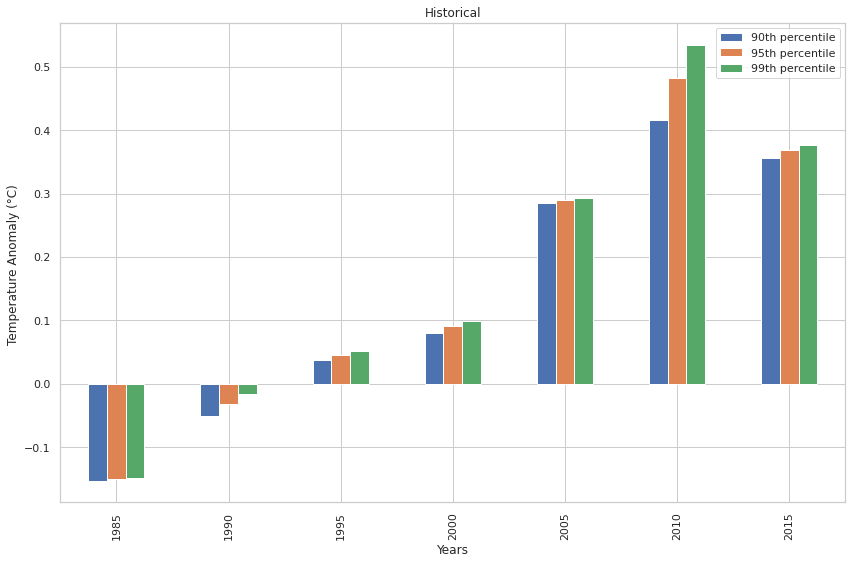

In [160]:
fig, ax = plt.subplots()

anom_hist_quant.plot(kind='bar', ax=ax, title='Historical')

#labels = ['90th percentile','95th percentile','99th percentile']


#ax.legend(labels)
plt.xlabel('Years')
plt.ylabel('Temperature Anomaly (°C) ')
plt.tight_layout()

### SSP126

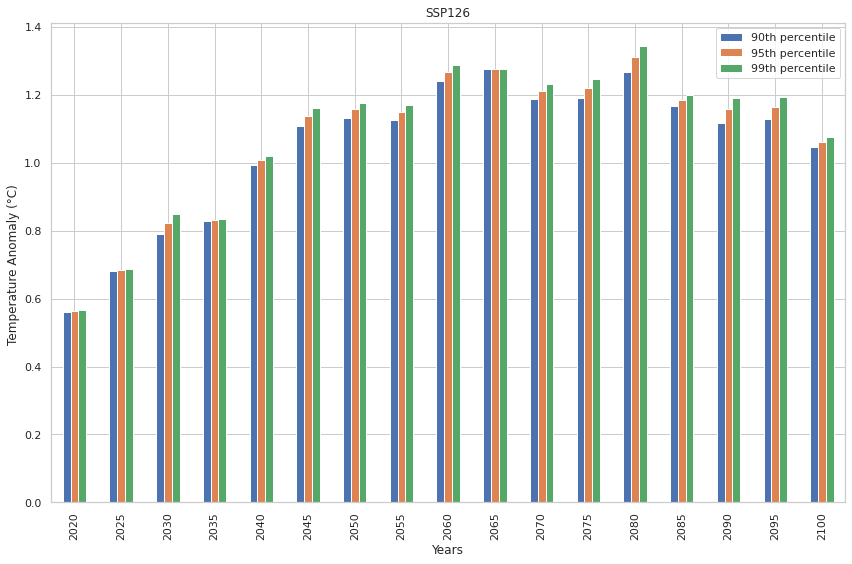

In [109]:
temp = monthly_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].groupby('time.month').mean('time')
# Difference
ann_tas_anom = temp[1].groupby('time.month') - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc['2015':]

df_tas = ann_tas_anom.to_dataframe()

df_tas = df_tas.resample('1Y').mean()

df_tas['positive'] = df_tas['tas'] > 0
df_tas['Rolling'] = df_tas['tas'].rolling(5).mean()

df_tas.reset_index(inplace=True)

df_tas['positive'] = df_tas['positive'].astype(str)

df_tas['positive'] = df_tas['positive'].str.replace('True','Positive')
df_tas['positive'] = df_tas['positive'].str.replace('False','Negative')

df_tas['time'] = df_tas['time'].dt.year

df_tas.rename(columns={'positive':'Anomaly', 'time':'year'}, inplace=True)

df_tas.year = pd.to_datetime(df_tas.year, format='%Y')


anom_hist_quant = pd.DataFrame()
anom_hist_quant['90th percentile'] = df_tas.groupby(pd.Grouper(key='year', freq='5Y')).tas.quantile(0.90)
anom_hist_quant['95th percentile'] = df_tas.groupby(pd.Grouper(key='year', freq='5Y')).tas.quantile(0.95)
anom_hist_quant['99th percentile'] = df_tas.groupby(pd.Grouper(key='year', freq='5Y')).tas.quantile(0.99)
anom_hist_quant = anom_hist_quant['2020':]

anom_hist_quant.index = anom_hist_quant.index.year

fig, ax = plt.subplots()

anom_hist_quant.plot(kind='bar', ax=ax, title='SSP126')

#labels = ['90th percentile','95th percentile','99th percentile']


#ax.legend(labels)
plt.xlabel('Years')
plt.ylabel('Temperature Anomaly (°C) ')
plt.tight_layout()

## SSP245

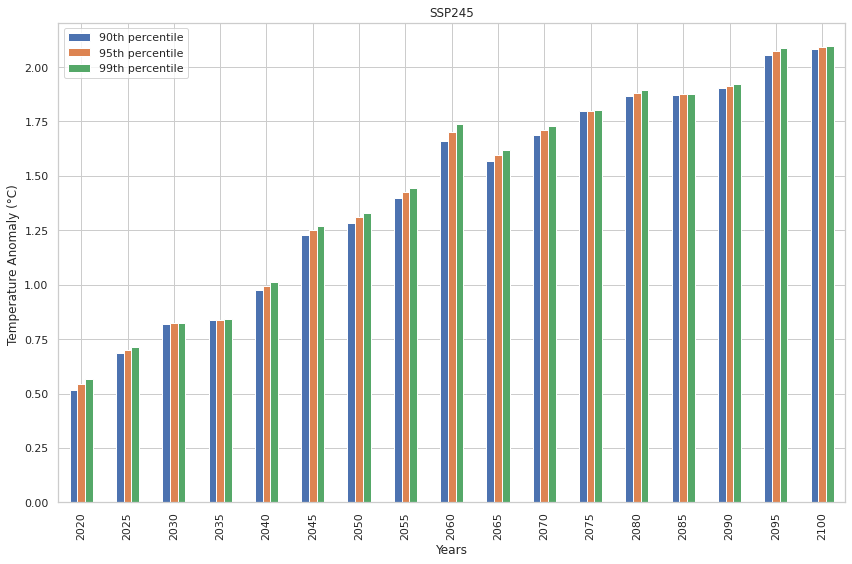

In [110]:
temp = monthly_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].groupby('time.month').mean('time')
# Difference
ann_tas_anom = temp[2].groupby('time.month') - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc['2015':]

df_tas = ann_tas_anom.to_dataframe()

df_tas = df_tas.resample('1Y').mean()

df_tas['positive'] = df_tas['tas'] > 0
df_tas['Rolling'] = df_tas['tas'].rolling(5).mean()

df_tas.reset_index(inplace=True)

df_tas['positive'] = df_tas['positive'].astype(str)

df_tas['positive'] = df_tas['positive'].str.replace('True','Positive')
df_tas['positive'] = df_tas['positive'].str.replace('False','Negative')

df_tas['time'] = df_tas['time'].dt.year

df_tas.rename(columns={'positive':'Anomaly', 'time':'year'}, inplace=True)

df_tas.year = pd.to_datetime(df_tas.year, format='%Y')

anom_hist_quant = pd.DataFrame()
anom_hist_quant['90th percentile'] = df_tas.groupby(pd.Grouper(key='year', freq='5Y')).tas.quantile(0.90)
anom_hist_quant['95th percentile'] = df_tas.groupby(pd.Grouper(key='year', freq='5Y')).tas.quantile(0.95)
anom_hist_quant['99th percentile'] = df_tas.groupby(pd.Grouper(key='year', freq='5Y')).tas.quantile(0.99)
anom_hist_quant = anom_hist_quant['2020':]

anom_hist_quant.index = anom_hist_quant.index.year

fig, ax = plt.subplots()

anom_hist_quant.plot(kind='bar', ax=ax, title='SSP245')

#labels = ['90th percentile','95th percentile','99th percentile']


#ax.legend(labels)
plt.xlabel('Years')
plt.ylabel('Temperature Anomaly (°C) ')
plt.tight_layout()

### SSP585

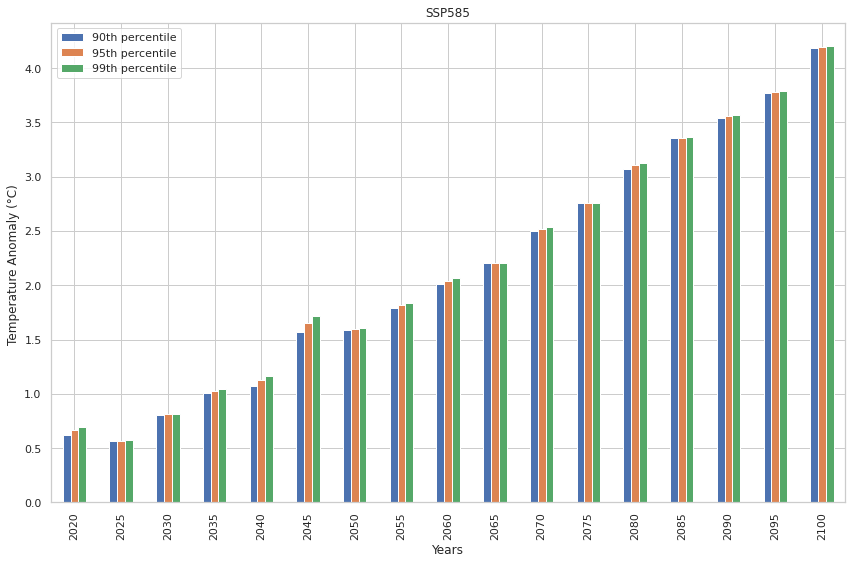

In [112]:
temp = monthly_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].groupby('time.month').mean('time')
# Difference
ann_tas_anom = temp[3].groupby('time.month') - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc['2015':]

df_tas = ann_tas_anom.to_dataframe()

df_tas = df_tas.resample('1Y').mean()

df_tas['positive'] = df_tas['tas'] > 0
df_tas['Rolling'] = df_tas['tas'].rolling(5).mean()

df_tas.reset_index(inplace=True)

df_tas['positive'] = df_tas['positive'].astype(str)

df_tas['positive'] = df_tas['positive'].str.replace('True','Positive')
df_tas['positive'] = df_tas['positive'].str.replace('False','Negative')

df_tas['time'] = df_tas['time'].dt.year

df_tas.rename(columns={'positive':'Anomaly', 'time':'year'}, inplace=True)

df_tas.year = pd.to_datetime(df_tas.year, format='%Y')

anom_hist_quant = pd.DataFrame()
anom_hist_quant['90th percentile'] = df_tas.groupby(pd.Grouper(key='year', freq='5Y')).tas.quantile(0.90)
anom_hist_quant['95th percentile'] = df_tas.groupby(pd.Grouper(key='year', freq='5Y')).tas.quantile(0.95)
anom_hist_quant['99th percentile'] = df_tas.groupby(pd.Grouper(key='year', freq='5Y')).tas.quantile(0.99)
anom_hist_quant = anom_hist_quant['2020':]

anom_hist_quant.index = anom_hist_quant.index.year

fig, ax = plt.subplots()

anom_hist_quant.plot(kind='bar', ax=ax, title='SSP585')

#labels = ['90th percentile','95th percentile','99th percentile']


#ax.legend(labels)
plt.xlabel('Years')
plt.ylabel('Temperature Anomaly (°C) ')
plt.tight_layout()

# Monthly temperature anomalies with Monthly CMIP6 CDS

In [113]:
temp = monthly_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].groupby('time.month').mean('time')
# Difference
month_anom = temp[0].groupby('time.month') - temp_clim

m_temp = month_anom.to_dataframe()
m_temp.reset_index(inplace=True)
m_temp['positive'] = m_temp['tas'] > 0
m_temp['Rolling'] = m_temp['tas'].rolling(5).mean()
m_temp.reset_index(inplace=True)
m_temp['time'] = pd.to_datetime(m_temp['time'])

m_temp['year'] = m_temp['time'].dt.year

m_temp['month'] = m_temp['time'].dt.month_name()

m_temp = m_temp[['tas','year','month']]

m_temp_anom = m_temp.pivot_table(columns='year',index='month',values='tas')

m_temp_anom = m_temp_anom[[1980,1985,1990,
            1995,2000,2005,2010]]

m_temp_anom = m_temp_anom.reindex(([ 'January','February','March','April', 'May','June','July','August' ,'September','October', 'November','December']))

Text(0.5, 0, 'Month')

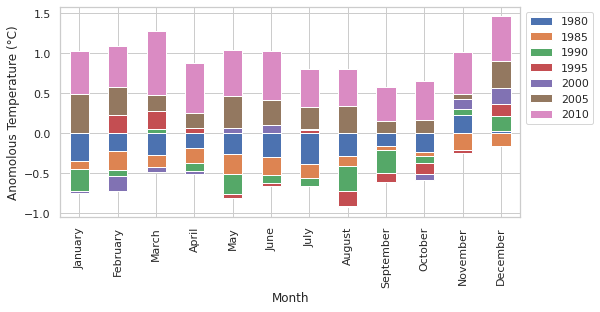

In [114]:
#set seaborn plotting aesthetics
plt.rcParams["figure.figsize"] = [8.5, 4.50]
plt.rcParams["figure.autolayout"] = True
sns.set(style='whitegrid')

#create stacked bar chart
m_temp_anom.plot(kind='bar', stacked=True)

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel('Anomolous Temperature (°C)')
plt.xlabel('Month')

### Decade trend anomaly

#### Historical

In [129]:
temp = annual_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].mean()
# Difference
ann_tas_anom = temp[0] - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc['1980':]

df_tas = ann_tas_anom.to_dataframe()
df_tas.reset_index(inplace=True)
df_tas.year = pd.to_datetime(df_tas.year, format='%Y')

hist_anom = df_tas
mean_hist_anom = hist_anom.groupby(pd.Grouper(key='year', freq='10Y')).mean()

mean_hist_anom.index = mean_hist_anom.index.year

mean_hist_anom.rename(columns={'tas':'historical'}, inplace=True)

#### SSP126

In [130]:
temp = annual_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].mean()
# Difference
ann_tas_anom = temp[1] - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc['1980':]

df_tas = ann_tas_anom.to_dataframe()
df_tas.reset_index(inplace=True)
df_tas.year = pd.to_datetime(df_tas.year, format='%Y')

ssp126_anom = df_tas
mean_ssp126_anom = ssp126_anom.groupby(pd.Grouper(key='year', freq='10Y')).mean()

mean_ssp126_anom.index = mean_ssp126_anom.index.year

mean_ssp126_anom.rename(columns={'tas':'ssp126'}, inplace=True)

#### SSP245

In [131]:
temp = annual_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].mean()
# Difference
ann_tas_anom = temp[2] - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc['1980':]

df_tas = ann_tas_anom.to_dataframe()
df_tas.reset_index(inplace=True)
df_tas.year = pd.to_datetime(df_tas.year, format='%Y')

ssp245_anom = df_tas

mean_ssp245_anom = ssp245_anom.groupby(pd.Grouper(key='year', freq='10Y')).mean()

mean_ssp245_anom.index = mean_ssp245_anom.index.year

mean_ssp245_anom.rename(columns={'tas':'ssp245'}, inplace=True)

#### SSP585

In [132]:
temp = annual_temp.tas.mean(dim='model')
# Select Historical
temp_clim = temp[0].mean()
# Difference
ann_tas_anom = temp[3] - temp_clim
# Filter range
ann_tas_anom = ann_tas_anom.loc['1980':]

df_tas = ann_tas_anom.to_dataframe()
df_tas.reset_index(inplace=True)
df_tas.year = pd.to_datetime(df_tas.year, format='%Y')

ssp585_anom = df_tas

mean_ssp585_anom = ssp585_anom.groupby(pd.Grouper(key='year', freq='10Y')).mean()

mean_ssp585_anom.index = mean_ssp585_anom.index.year

mean_ssp585_anom.rename(columns={'tas':'ssp585'}, inplace=True)

In [133]:
decade_trend_temp = pd.concat([mean_hist_anom,mean_ssp126_anom,mean_ssp245_anom,mean_ssp585_anom], axis=1)
decade_trend_temp = decade_trend_temp[1:]

#### Plot

Text(0.5, 1.0, 'Decadal Anomalies')

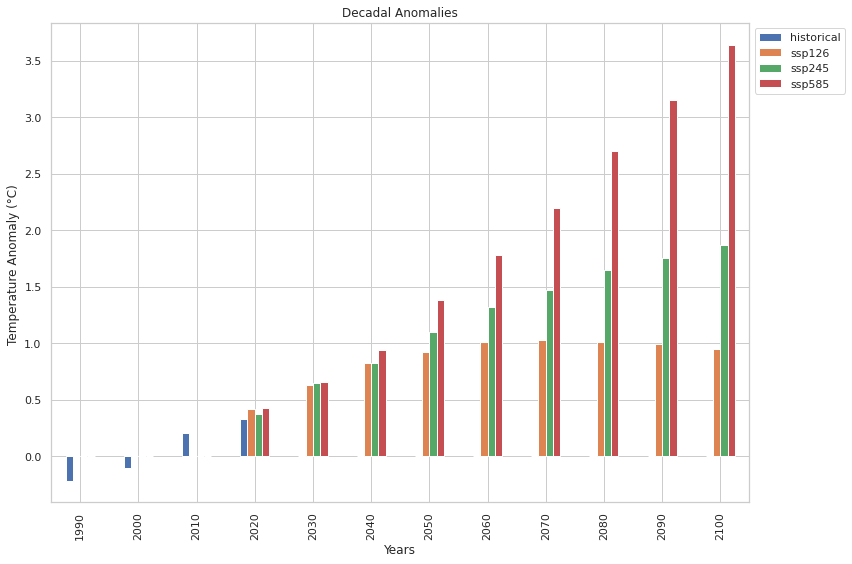

In [134]:
plt.rcParams["figure.figsize"] = [12, 8]
fig, ax = plt.subplots(1,1)

decade_trend_temp.plot(kind='bar', ax=ax)


#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


#labels = ['90th percentile','95th percentile','99th percentile']

plt.legend()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Years')
plt.ylabel('Temperature Anomaly (°C) ')
plt.tight_layout()
plt.title('Decadal Anomalies')

### Decade trend grouped

In [135]:
decade_trend_temp

,historical,ssp126,ssp245,ssp585
year,,,,
1990,-0.215066,NaN,NaN,NaN
2000,-0.104141,NaN,NaN,NaN
2010,0.206183,NaN,NaN,NaN
2020,0.325025,0.417782,0.371238,0.429404
2030,NaN,0.634212,0.647962,0.658954
2040,NaN,0.825466,0.825450,0.944103
2050,NaN,0.919461,1.103279,1.379753
2060,NaN,1.013442,1.321249,1.782149
2070,NaN,1.030880,1.468696,2.197140


In [136]:
decade_stack = decade_trend_temp.transpose()

In [137]:
stack_anom = decade_stack.stack()

In [138]:
stack_anom = stack_anom.to_frame()

In [139]:
stack_anom.reset_index(inplace=True)

In [140]:
stack_anom.rename(columns={'level_0':'experiment',0:'tas'}, inplace=True)

In [141]:
stack_anom.head()

,experiment,year,tas
0,historical,1990,-0.215066
1,historical,2000,-0.104141
2,historical,2010,0.206183
3,historical,2020,0.325025
4,ssp126,2020,0.417782


Text(0.5, 0.98, 'Decadal Distribution')

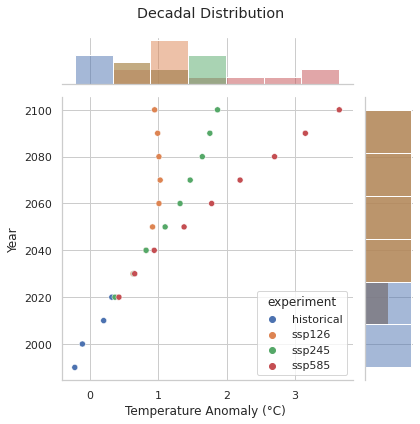

In [142]:
ax = sns.JointGrid(x = "tas", y = "year", data = stack_anom, hue='experiment')

ax.plot(sns.scatterplot, sns.histplot)

ax.set_axis_labels(xlabel='Temperature Anomaly (°C) ', ylabel='Year')
plt.suptitle('Decadal Distribution')

Text(0.5, 0.98, 'Decadal Distribution')

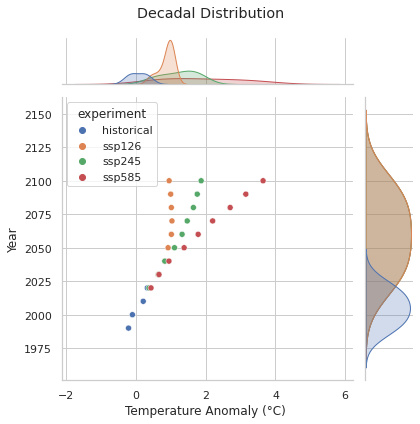

In [143]:
ax = sns.jointplot(x = "tas", y = "year", data = stack_anom, hue='experiment')
ax.set_axis_labels(xlabel='Temperature Anomaly (°C) ', ylabel='Year')
plt.suptitle('Decadal Distribution')

Text(0.5, 0, 'Temperature (°C)')

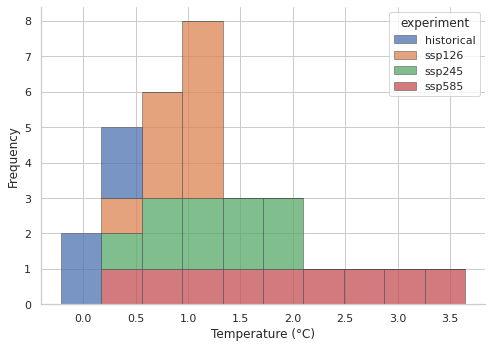

In [150]:
f, ax = plt.subplots(figsize=(7, 5))

# removes the top and right axes spines
sns.despine(f)

# plot according to classification
sns.histplot(
    stack_anom,
    x="tas", hue="experiment",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    bins=10
)

plt.ylabel('Frequency')
plt.xlabel('Temperature (°C)')
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.set_xticks([0.5, 3.5, 5.7, 10,15,20])

### Monthly Precipitation Distribution

Text(0.5, 0.98, 'Annual Mean Distribution')

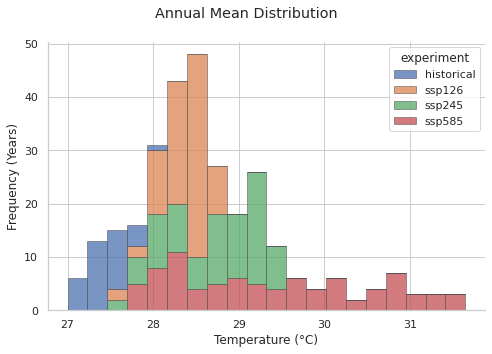

In [152]:
temp = monthly_temp.tas.mean(dim='model')

test = temp.to_dataframe()

test.reset_index(inplace=True)

test.set_index('time', inplace=True)

test = test.groupby('experiment').resample('1Y').mean()

test.reset_index(inplace=True)

test

f, ax = plt.subplots(figsize=(7, 5))

# removes the top and right axes spines
sns.despine(f)

# plot according to classification
sns.histplot(
    test,
    x="tas", hue="experiment",
    multiple="stack",
    #palette="light",
    edgecolor=".3",
    linewidth=.5,
    #log_scale=True,
    bins=20# log scale
)

plt.ylabel('Frequency (Years)')
plt.xlabel('Temperature (°C)')
#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.set_xticks([500, 1000, 2000, 5000, 10000])
plt.suptitle('Annual Mean Distribution')

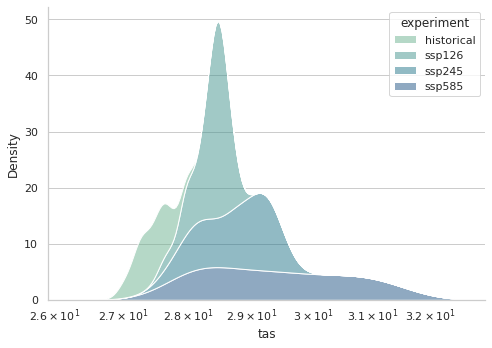

In [146]:
f, ax = plt.subplots(figsize=(7, 5))

# removes the top and right axes spines
sns.despine(f)

# plot according to classification
sns.kdeplot(
    data=test,
    x="tas", hue="experiment",multiple="stack",
    fill=True, common_norm=True,  palette="crest",
    alpha=.5, 
    log_scale=True # log scale
)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.set_xticks([500, 1000, 2000, 5000, 10000])